In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

ts = TimeSeries(key='OSAVZTYVBVR3Y213',output_format='pandas', indexing_type='date')

In [2]:
market, meta_data = ts.get_daily_adjusted('SPX', outputsize='full')
market = market['5. adjusted close']
market = pd.DataFrame(market)
#data.rename(columns = {'AEP'})
market.columns = ['SPX']

market.head()

ConnectionError: HTTPSConnectionPool(host='www.alphavantage.co', port=443): Max retries exceeded with url: /query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPX&outputsize=full&apikey=OSAVZTYVBVR3Y213&datatype=json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000274652FC4A8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [3]:
def get_trend_factors(df, short_wnd, long_wnd):
    #All Returns are Annualized
    df['DailyR'] = df/df.shift(1)-1
    df['ShortTermMA'] = df['DailyR'].rolling(short_wnd).mean()
    df['LongTermMA'] = df['DailyR'].rolling(long_wnd).mean()

short_wnd = 60
long_wnd = 252
get_trend_factors(market, short_wnd, long_wnd)
market.head()
sns.distplot(market['DailyR'])
#sns.distplot(market['ShortTerm'])

NameError: name 'market' is not defined

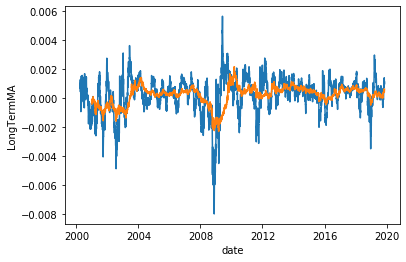

In [37]:
sns.lineplot(x=market.index, y="ShortTermMA",data=market)
sns.lineplot(x=market.index, y="LongTermMA",data=market)

In [41]:
def get_vol_factors(df, short_wnd, long_wnd):
    df['ShortVol'] = df['DailyR'].rolling(short_wnd).std()*np.sqrt(252)
get_vol_factors(market, short_wnd, long_wnd)
market.dropna(inplace = True)
market.head()

,SPX,DailyR,ShortTermMA,LongTermMA,ShortVol
date,,,,,
2001-03-28,1153.29,-0.024430,-0.002133,-0.000966,0.246222
2001-03-29,1147.95,-0.004630,-0.001743,-0.000986,0.240308
2001-03-30,1160.33,0.010784,-0.002398,-0.000889,0.216400
2001-04-02,1145.87,-0.012462,-0.002430,-0.000967,0.216743
2001-04-03,1106.46,-0.034393,-0.002566,-0.001123,0.221166


,M1,M2,M3
Y1,0,0.32,0.40
Y2,0,0.28,0.34
Y3,0,0.54,0.98
Y4,0,0.07,0.14
Y5,0,0.13,0.25


In [4]:
market

NameError: name 'market' is not defined